### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import random


### Functions

In [2]:
def diff_calc(entries):
    a,b = random.sample(entries, 2)
    entries.remove(a)
    entries.remove(b)
    diff = abs(a - b)
    entries.append(diff)
    return entries


In [3]:
def final_number(entries):
    while len(entries) > 1:
        diff_calc(entries)
    return entries[0]


In [4]:
def distribution_plotter(n, iterations):
    distribution = np.zeros(n+1)
    for _ in range(iterations):
        entries = list(range(1,n+1))
        final = final_number(entries)
        distribution[final] += 1
    return distribution/iterations


### Plots

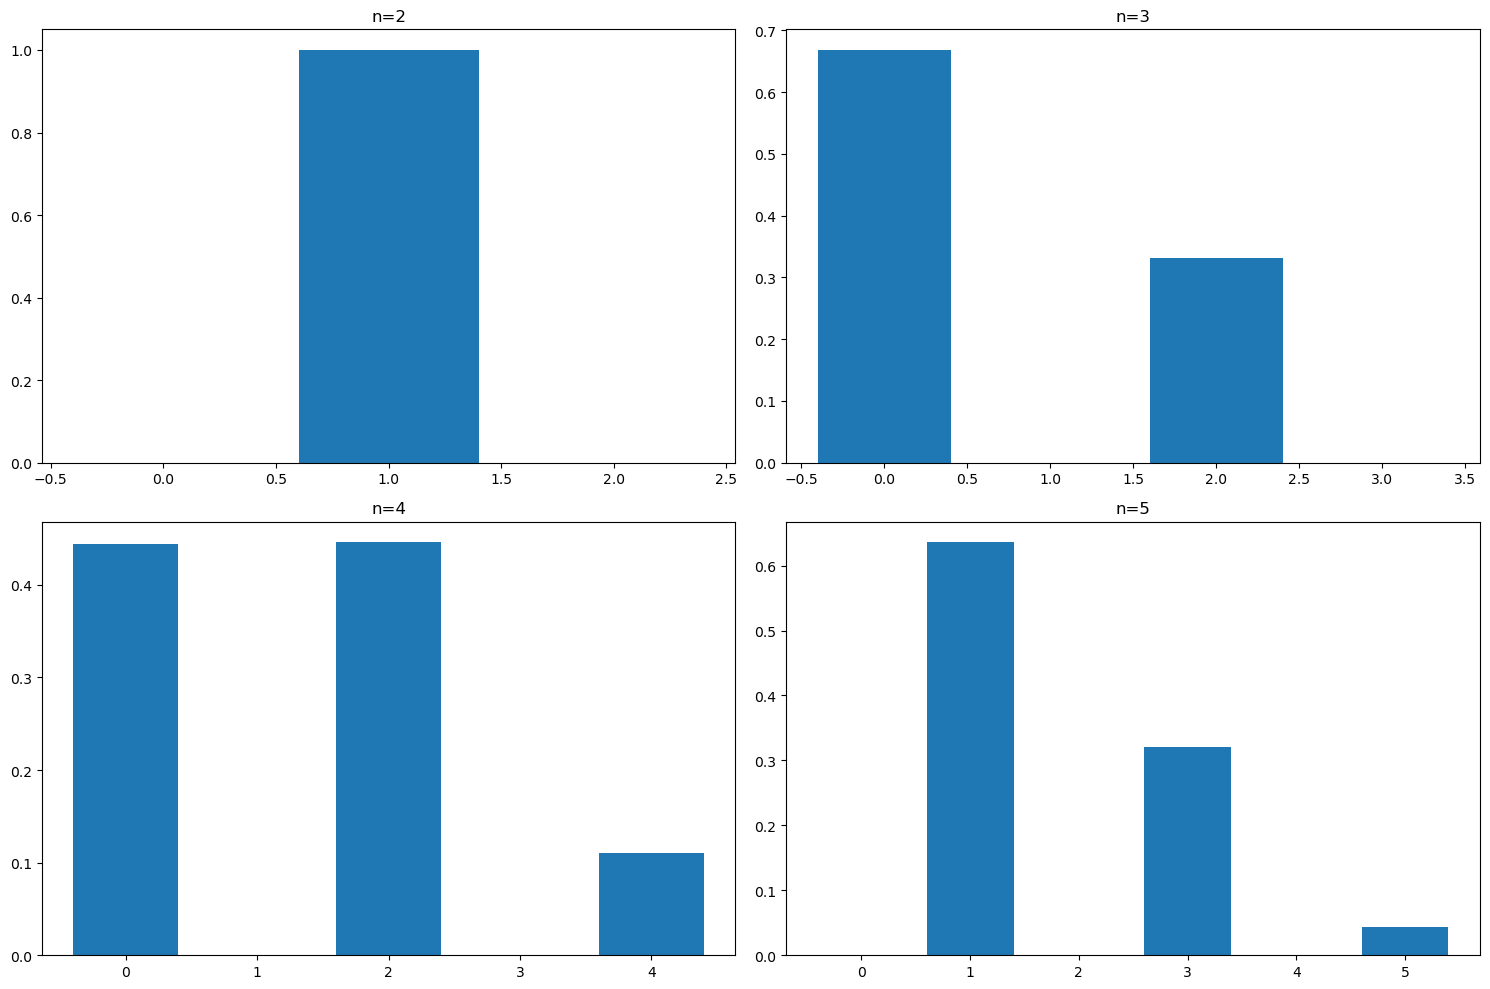

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, n in enumerate(range(2, 6)):
    points = distribution_plotter(n, 100000)
    
    row = i // 2
    col = i % 2
    
    axs[row, col].bar([j for j in range(n+1)], points)
    
    axs[row, col].set_title(f'n={n}')

plt.tight_layout()
plt.show()


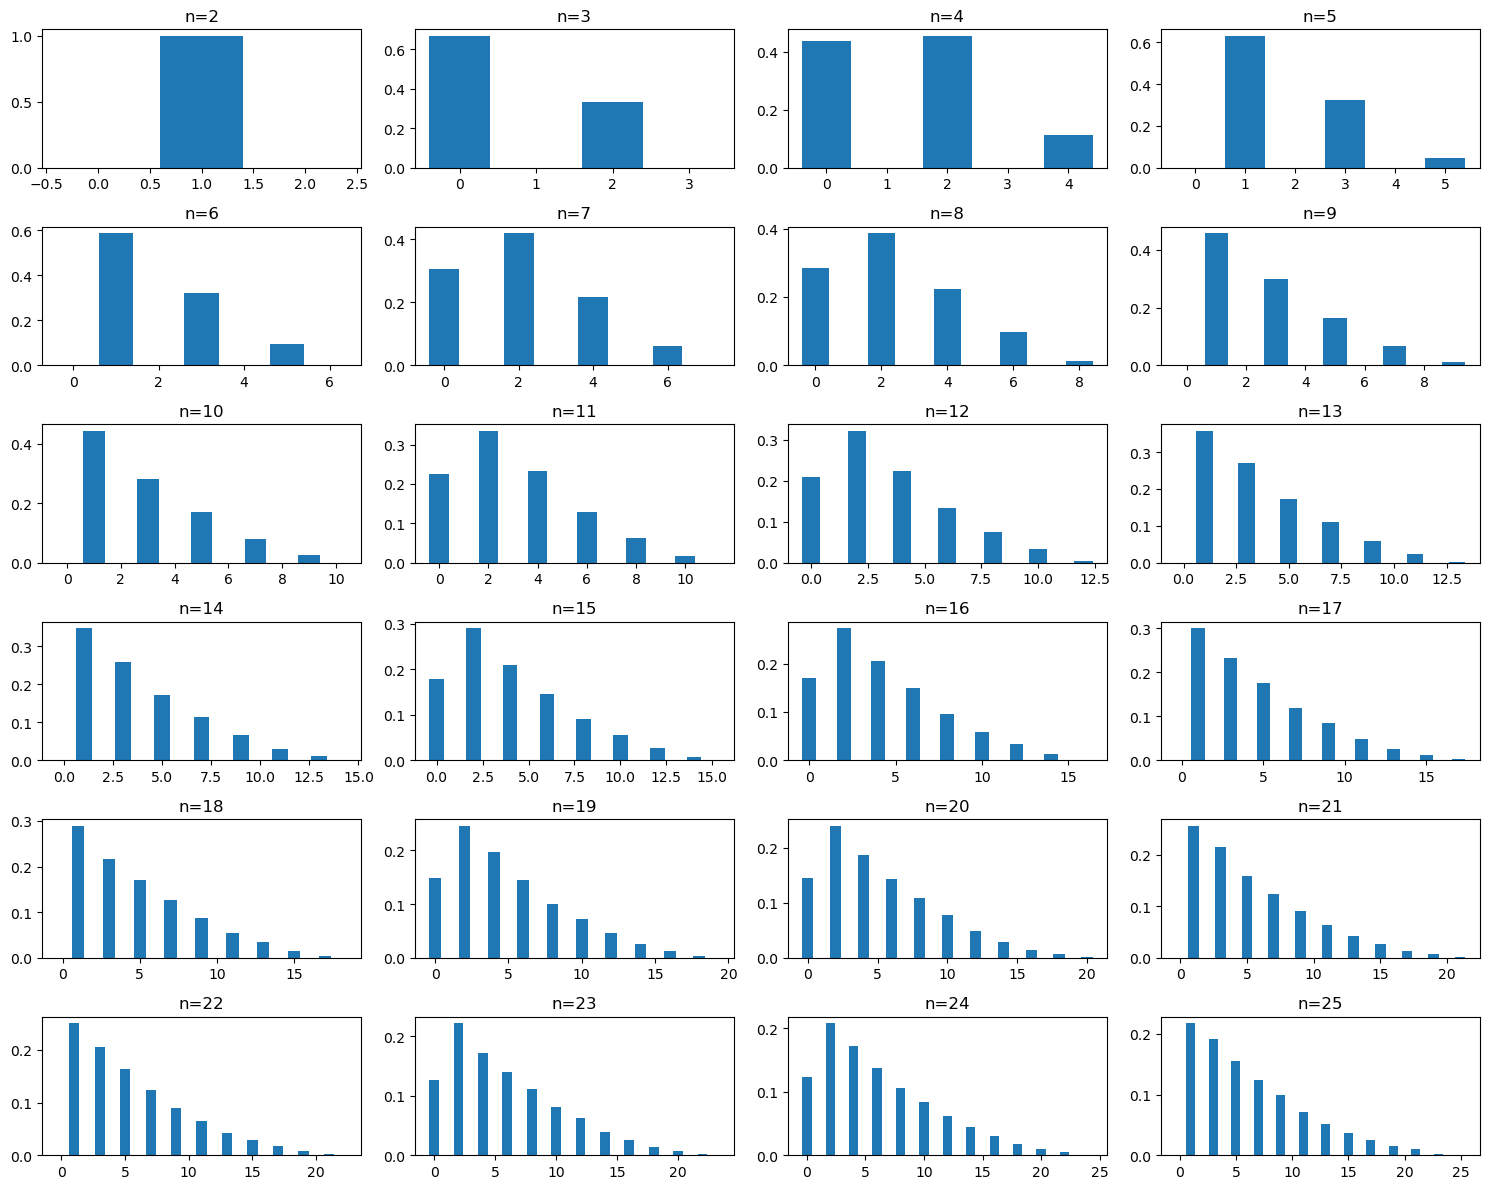

In [6]:
fig, axs = plt.subplots(6, 4, figsize=(15, 12))

for i, n in enumerate(range(2, 26)):
    points = distribution_plotter(n, 10000)
    
    row = i // 4
    col = i % 4
    
    axs[row, col].bar([j for j in range(n+1)], points)
    
    axs[row, col].set_title(f'n={n}')

plt.tight_layout()
plt.show()


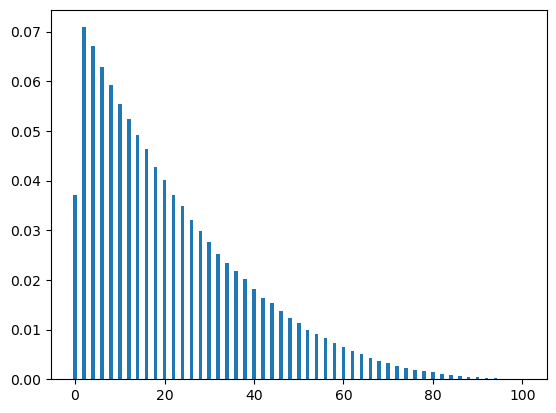

In [7]:
n = 100
points = distribution_plotter(n,1000000)

plt.bar([i for i in range(n+1)], points)
plt.show()


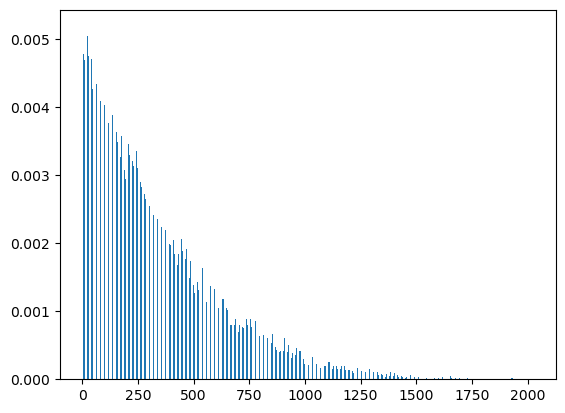

In [8]:
n = 2024
points2 = distribution_plotter(n,100000)

plt.bar([i for i in range(n+1)], points2)
plt.show()


### Geometric Comparison

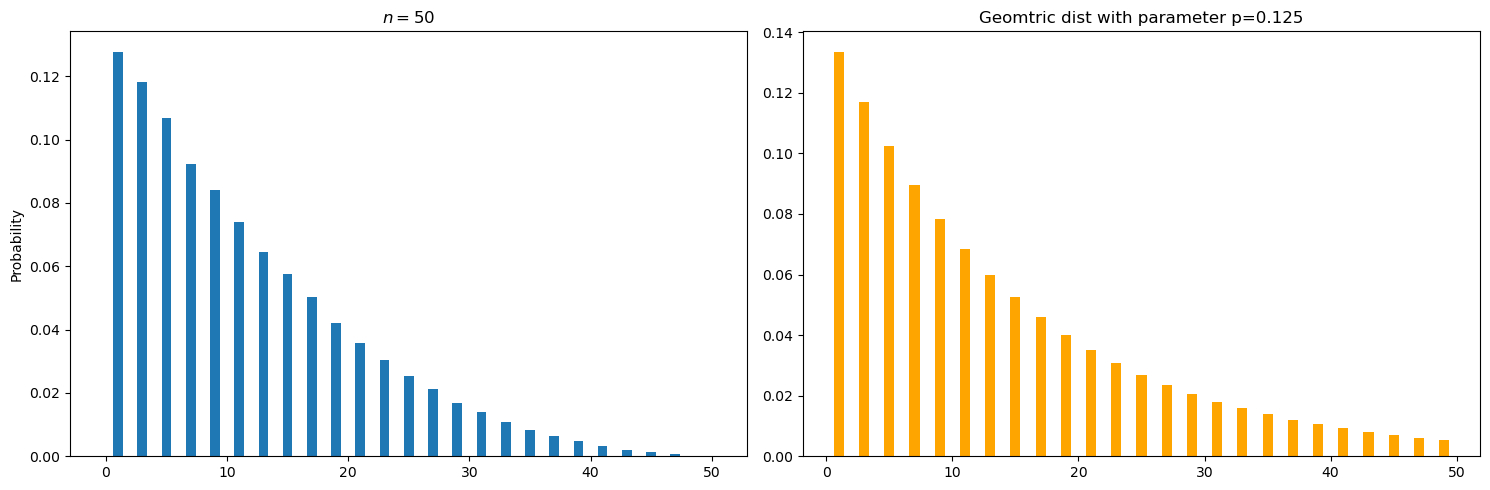

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

n = 50
points = distribution_plotter(n,100000)
axs[0].bar([j for j in range(n+1)], points)
axs[0].set_ylabel('Probability')
axs[0].set_title(f'$n={n}$')

p=0.125
k = np.arange(1, n+1, 2)
pmf = (1 - p) ** (k/2 - 1) * p
axs[1].bar(k, pmf, color='orange')
axs[1].set_title(f'Geomtric dist with parameter p={p}')

plt.tight_layout()
plt.show()
